# Regresión Lineal

En estadística, la regresión lineal o ajuste lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, $m$ variables independientes $X_i$, Este modelo puede ser expresado como:

$Y=β_0 + β_1X_1 + ... + β_mX_m + ε$

donde:

$Y$ es la variable dependiente o variable de respuesta.

$X_1, X_2,...,X_m$son las variables explicativas, independientes o regresoras.

$β_0,β_1,β_2,...,β_m$ son los parámetros del modelo, miden la influencia que las variables explicativas tienen sobre el regrediendo.

# Breve Historia
La primera forma de regresión lineal documentada fue el método de los mínimos cuadrados que fue publicada por Legendre en 1805, Gauss publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados,1​ y en dónde se incluía una versión del teorema de Gauss-Márkov.

El término regresión se utilizó por primera vez en el estudio de variables antropométricas: al comparar la estatura de padres e hijos, donde resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio.2​ La constatación empírica de esta propiedad se vio reforzada más tarde con la justificación teórica de ese fenómeno.

El término lineal se emplea para distinguirlo del resto de técnicas de regresión, que emplean modelos basados en cualquier clase de función matemática. Los modelos lineales son una explicación simplificada de la realidad, mucho más ágiles y con un soporte teórico mucho más extenso por parte de la matemática y la estadística.

Pero bien, como se ha dicho, se puede usar el término lineal para distinguir modelos basados en cualquier clase de aplicación.


[Regresión Lineal](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)

![ejemplo de regresión](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/350px-Linear_regression.svg.png)

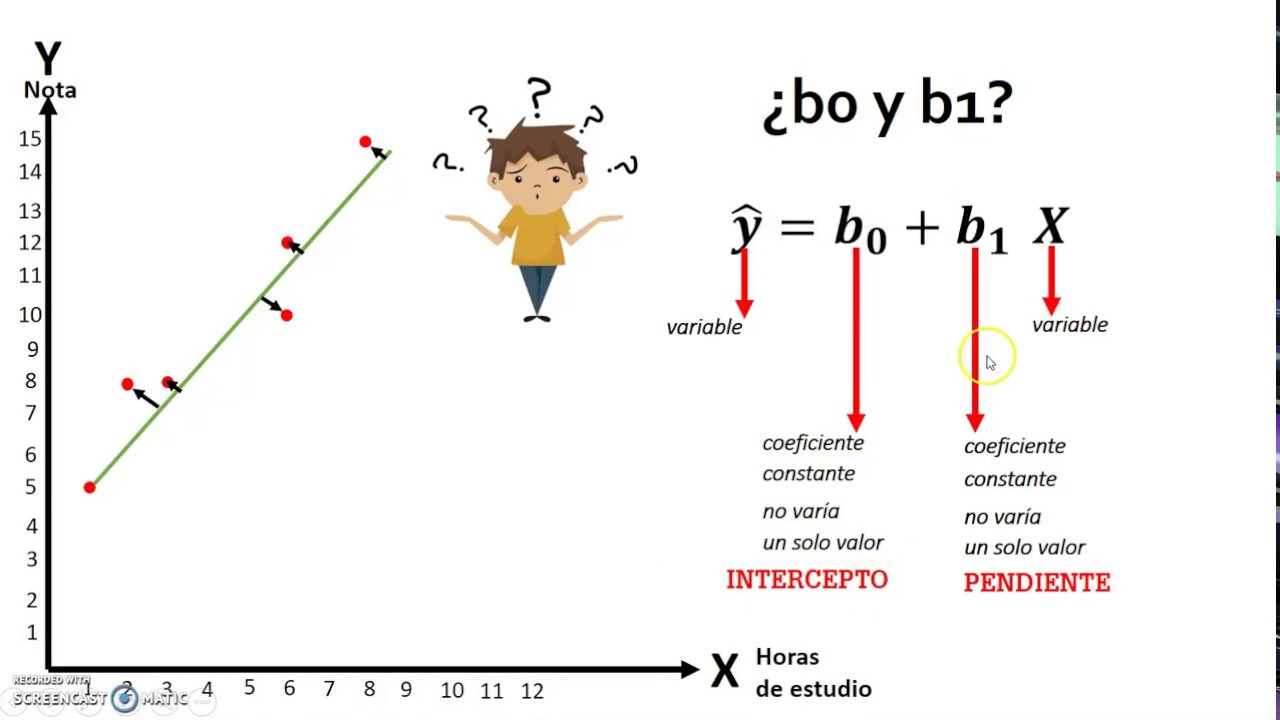

In [29]:
import pandas as pd
import matplotlib as npl
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [33]:
data=pd.read_csv("../qbdav/OneDrive/Documents/GitHub/python-ml-course/datasets/ads/Advertising.csv")

In [34]:
print(data.dtypes)
print(data.describe())
print("/n")
print(data.describe(include="all"))

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
/n
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.

In [35]:
 data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


El anterior data set describe las ventas de una compañía de acuerdo a las inversiones de publicidad en TV, Radio y periodico. El planteamiento del problema sería maximizar las ventas haciendo las inversiones de TV mínimas.

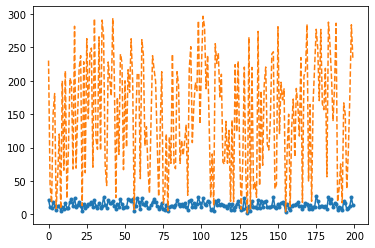

In [70]:
plt.plot(data.Sales,marker=".")
plt.plot(data.TV,'--')

In [77]:
lm = smf.ols(formula="Sales~TV", data = data).fit()
##con la formula indico la variable predictora Sales en función de inversiones en TV
##.fit ajusta el modelo a las condiciones

In [42]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería 
Sales = 7.032 + 0.047*TV

In [44]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [45]:
lm.rsquared

0.611875050850071

In [47]:
lm.rsquared_adj

0.6099148238341623

In [49]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.47e-42
Time:                        14:43:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

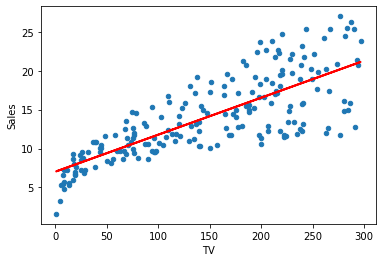

In [73]:
sales_pred=lm.predict(pd.DataFrame(data["TV"]))
%matplotlib inline
data.plot(kind="scatter",x="TV", y="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth=2)

In [74]:
data["sales_pred"]=7.032594+0.047537*data["TV"]

In [75]:
data["RSE"]=(data["Sales"]-data["sales_pred"])**2
##Error estándar residual

In [82]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [83]:
RSE =np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [84]:
sales_m=np.mean(data["Sales"])
sales_m

14.022500000000003

In [86]:
error = RSE/sales_m
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

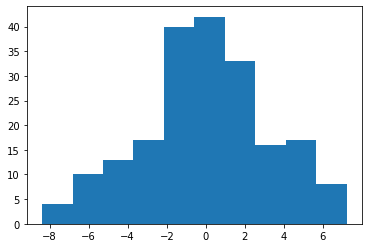

In [87]:
plt.hist((data["Sales"]-data["sales_pred"]))

## Conclusiones

los errores siguen una distribución normal de media cero.

los errores son altos (23%) se debería usar un modelo de regrsión lineal múltiple incluyendo las variables radio y newspaper y no solo TV.